<a href="https://colab.research.google.com/github/Shaurya2127/practice_projects/blob/main/Debt_status_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Loading the dataset
data = pd.read_csv('Company_x(csv).csv')

<ipython-input-3-415072ecd0c0>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Company_x(csv).csv')


In [ ]:
print(data.isnull().sum())

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                 397393
InBankruptcy                       0
AccountInsolvencyType         406138
CustomerInsolvencyType        397892
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
Unnamed: 22                   406423
Unnamed: 23                   406423
Unnamed: 24                   406422
dtype: int64


In [ ]:
# filling the null values in above  data

# Fill numerical null values with the mean
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].mean())

# Fill categorical null values with the mode
for col in data.select_dtypes(exclude=np.number):
    data[col] = data[col].fillna(data[col].mode()[0])

print(data.isnull().sum())

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                      0
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                      0
InBankruptcy                       0
AccountInsolvencyType              0
CustomerInsolvencyType             0
IsLegal                            0
LastPaymentAmount                  0
LastPaymentMethod                  0
NumLiableParties                   0
CustomerAge                        0
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
Unnamed: 22                   406423
Unnamed: 23                   406423
Unnamed: 24                        0
dtype: int64


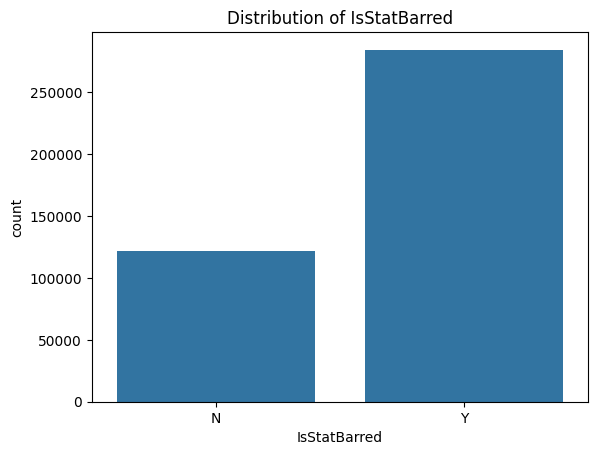

In [ ]:
# Analyze the distribution of 'IsStatBarred'

sns.countplot(x='IsStatBarred', data=data)
plt.title('Distribution of IsStatBarred')
plt.show()

In [ ]:
# splitting the data into independent and dependent variable
X = data.drop(columns = ["EntityID","AccountID","NumPhones","NumEmails","NumAddresses","Unnamed: 22","Unnamed: 23","Unnamed: 24","IsStatBarred"],axis = 1)
X.shape

(406423, 16)

In [ ]:
Y = data['IsStatBarred']
Y.shape

(406423,)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  object 
 4   DebtLoadPrincipal           406423 non-null  object 
 5   Balanaceatdebt_load         406423 non-null  object 
 6   PurchasePrice               406423 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               406423 non-null  object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       406423 non-null  object 
 12  CustomerInsolvencyType      406423 non-null  object 
 13  IsLegal       

In [ ]:
# defining the column transformer for preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
len(numerical_features)

3

In [ ]:
len(categorical_features)

13

In [ ]:
# encoding categorical variables
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

In [ ]:
# Spliting the dataset into training and testing sets)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Training Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# evaluating the model
Y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           N       0.96      0.97      0.96     24309
           Y       0.99      0.98      0.98     56976

    accuracy                           0.98     81285
   macro avg       0.97      0.98      0.97     81285
weighted avg       0.98      0.98      0.98     81285

Confusion Matrix:
 [[23603   706]
 [ 1057 55919]]


In [ ]:
# ROC AUC score
Y_prob = model.predict_proba(X_test)[:, 1]  # Probability of being 'Y'
roc_auc = roc_auc_score(Y_test, Y_prob)
print(f"ROC AUC Score: {roc_auc:.3f}")

ROC AUC Score: 0.997


In [ ]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')  # No skill
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: y_true takes value in {'N', 'Y'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.